# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **9.6 Comparación de métodos de segmentación**

## **Equipo # 16**
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646

## Table of Contents
1. [Introducción](#introduccion)
    - 1.1 [Segmentación](#segmentacion) 
    - 1.2 [Mean Shift Clustering](#meanshift)
2. [Código](#codigo)
    - 2.1. [Librerías](#librerias)
    - 2.2. [Implementación](#implementacion)
    - 2.3 [Ejemplos de imágenes](#ejemplosdeimagenes)
5. [Conclusiones](#Conclusiones)
6. [Referencias](#Referencias)


# Introducción <a class="anchor" id="introduccion" ></a>

## Segmentación <a class="anchor" id="segmentacion" ></a>

La segmentación de imágenes es el asignar a cada pixel una clase o etiqueta de acuerdo a diferentes grupos. Existen diferentes tipos de segmentación de imágenes:
* **Segmentación Semántica:** Implica organizar los pixeles de una imagen en función de clases semánticas. Cada pixel pertenece a una clase especifica y el modelo no hace referencia a ningún otro contexto o información. Un ejemplo seria una imagen con arboles y vehículos. Se asignaría una mascara que categorice a todos los arboles en una clase, y a todos los vehículos en otra. 
* **Segmentación de instancia:** Implica clasificar los pixeles según las instancias de un objeto. Se separan las regiones similares o superpuestas según los limites de los objetos. Un ejemplo seria una imagen de una calle con diversas personas. Se debe identificar la cantidad de instancias de personas en la imagen. 
* **Segmentación Panóptica :** Es una combinación de segmentación semántica y de instancia. Predice la identidad de cada objeto, segregando cada instancia de objeto en la imagen. 


Así mismo, existen diferentes técnicas de segmentación:
* **Edge-Based Segmentation:** se enfoca en detectar los bordes de una imagen. Ubica los componentes asociados a los objetos de acuerdo a la información de sus bordes
* **Threshold-Based Segmentation:** segmenta dividiendo de acuerdo a la intensidad de los pixeles. Generalmente utilizada para separar los objetos de su fondo.  
* **Region-Based Segmentation:** busca dividir la imagen en regiones con características similares. Por lo que cada región es un grupo de píxeles, que el algoritmo localiza mediante un punto inicial.
* **Custer-Based Segmentation:** on algoritmos de clasificación no supervisados que ayudan a identificar información oculta en imágenes. El algoritmo divide imágenes en grupos de píxeles con características similares, separando elementos de datos y agrupando elementos similares en grupos. Este tipo lo abordaremos a profundidad con mean shift clustering en el siguiente apartado. 
* **Watershed Segmentacion:** son transformaciones en una imagen en escala de grises. Tratan las imágenes como mapas topográficos, y el brillo de los píxeles determina la elevación (altura). Divide las imágenes en múltiples regiones según la altura del píxel, agrupando píxeles con el mismo valor de gris.


## Mean Shift Clustering <a class="anchor" id="meanshift" ></a>

Clustering es una técnica de Machine Learning que implica la agrupación de puntos de datos. Dado un conjunto de puntos de datos, podemos utilizar un algoritmo de agrupación para clasificar cada punto de datos en un clúster específico. En teoría, los puntos de datos que están en el mismo clúster deben tener propiedades y/o características similares, mientras que los puntos de datos en diferentes clústeres deben tener propiedades y/o características muy diferentes. La agrupación es un método de Aprendizaje no Supervisado y es una técnica común para el análisis de datos estadísticos utilizada en muchos campos.

La agrupación Mean Shift es un algoritmo basado en ventanas deslizantes que intenta encontrar áreas densas de puntos de datos. Es un algoritmo basado en el centroide, lo que significa que el objetivo es localizar los puntos centrales de cada clúster, lo que funciona actualizando a los candidatos para que los puntos centrales sean la media de los puntos dentro de la ventana deslizante.

Estas ventanas candidatas son filtradas en una etapa de post procesamiento para eliminar los duplicados cercanos, formando el conjunto final de puntos centrales y sus correspondientes grupos.

Tomando como ejemplo un conjunto de datos creado como el siguiente:

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
cordinates = [[2, 2, 3], [6, 7, 8], [5, 10, 13]]

X, _ = make_blobs(n_samples = 120, centers = cordinates, cluster_std = 0.60)

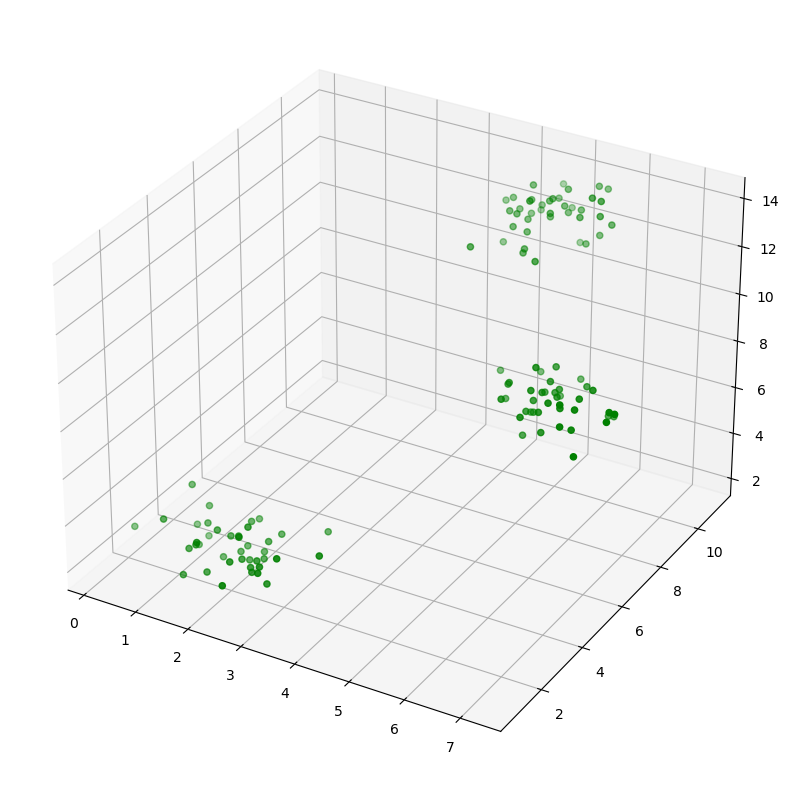

In [3]:
data_fig = plt.figure(figsize=(12, 10))
ax = data_fig.add_subplot(111, projection ='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o',color ='green')
plt.show()

El algorítmo de Mean Shift puede explicarse de la siguiente manera:

1. Inicia con una ventana circular deslizante centrada en el punto C, seleccionada aleatoriamente, y con el radio r como núcleo. Mean Shift es un algoritmo de escalada de colinas que implica el desplazamiento iterativo de este núcleo a una región de mayor densidad en cada paso hasta la convergencia.

2. En cada iteración, la ventana deslizante se desplaza hacia regiones de mayor densidad desplazando el punto central a la media de los puntos dentro de la ventana. La densidad dentro de la ventana deslizante es proporcional al número de puntos dentro de ella. Naturalmente, al cambiar a la media de los puntos en la ventana, gradualmente se moverá hacia áreas de mayor densidad de puntos.

3. Seguimos desplazando la ventana deslizante de acuerdo con la media hasta que no hay dirección en la que un desplazamiento pueda acomodar más puntos dentro del núcleo.

4. Se repite el proceso de los pasos 1 al 3 hasta que todos los puntos se encuentran dentro de una ventana. Cuando se superponen varias ventanas, se conserva la ventana que contiene la mayor cantidad de puntos. A continuación, los puntos de datos se agrupan según la ventana deslizante en la que residen.

Aplicando el método de Mean Shift para crear grupos, se observaría de la siguiente manera:

In [4]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

In [5]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(X)
cluster_centers = msc.cluster_centers_
labels = msc.labels_
cluster_label = np.unique(labels)


n_clusters = len(cluster_label)
n_clusters

3

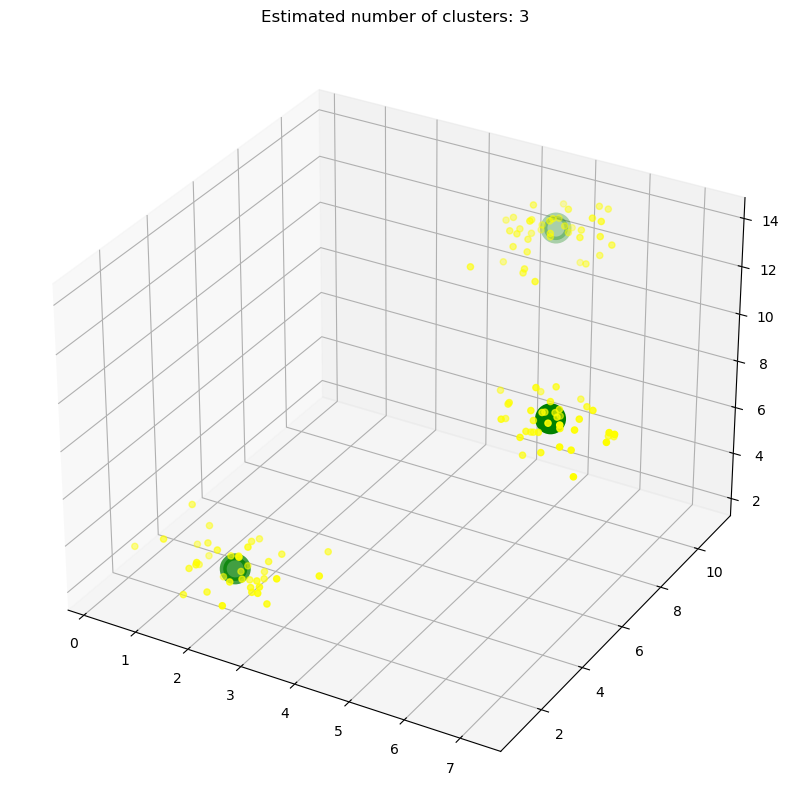

In [6]:
msc_fig = plt.figure(figsize=(12, 10))

ax = msc_fig.add_subplot(111, projection ='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o',color ='yellow')

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='o', color ='green',
          s = 300, linewidth = 5, zorder = 10)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

A diferencia de la agrupación K Means, no es necesario seleccionar el número de clústeres, ya que el desplazamiento medio lo descubre automáticamente. Es una gran ventaja. El hecho de que los clustering converjan hacia los puntos de máxima densidad también es muy deseable, ya que es bastante intuitivo de entender y encaja bien en un sentido naturalmente basado en datos. El inconveniente es que la selección del tamaño/radio “r” de la ventana puede ser no trivial.

# Código <a class="anchor" id="codigo" ></a>

## Librerías <a class="anchor" id="librerias" ></a>

In [7]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
import cv2
import math
import time

## Implementación <a class="anchor" id="implementacion" ></a>

Comenzamos generando una función para nuestra implementación del método de segmentación de imágenes de mean shift. 

In [8]:
def meanshift_apply(img, quantile):
    # Aplicamos un filtro para reducir el ruido
    img = cv2.medianBlur(img, 3)
    
    # Cambiamos la forma de la imagen a ‘plana’
    X = img.reshape((-1, 3))

    # Se calcula el tamaño de la ventana de acuerdo al cuantil
    bandwidth = estimate_bandwidth(X, quantile=quantile, n_samples=500)

    # Utilizamos el método de mean shift de sklearn.cluster
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)

    # Obtenemos las labels y los cluster centers
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    # Asignamos cada pixel a su respectivo cluster de centro de color
    segmented_image = cluster_centers[labels].astype(np.uint8)
    segmented_image = segmented_image.reshape(img.shape)    
    
    # Regresamos la imagen segmentada, y la cantidad de segmentos
    return segmented_image, len(np.unique(labels))

Seguido, cargamos una imagen, aplicamos la función con el método, y registramos el tiempo de procesamiento

In [9]:
# Cargamos la imagen
image = cv2.imread('data/image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

start_time = time.time() # Registramos la hora de inicio

# Aplicamos la función
segmented_image, segments = meanshift_apply(image, 0.1)    

end_time = time.time() # Registramos la hora en la que termino de procesar
processing_time = round(end_time - start_time, 2)

Graficamos la imagen original contra la imagen segmentada

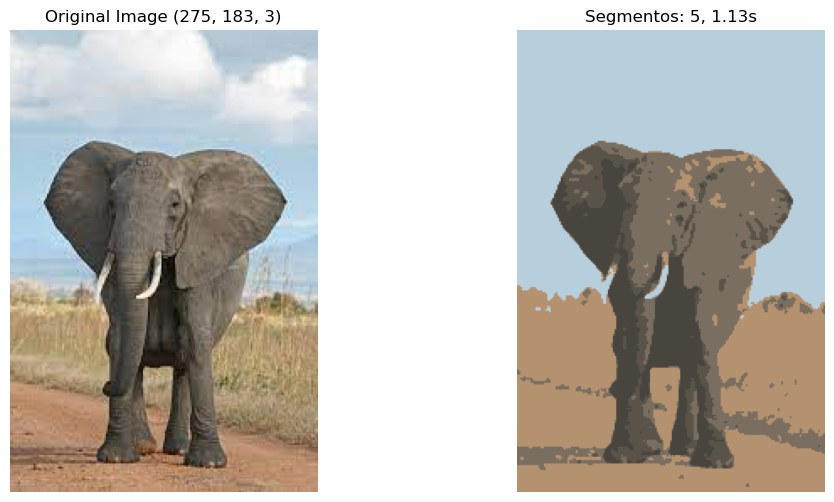

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image ' + str(image.shape))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmentos: '+str(segments)+', '+str(processing_time)+'s')
plt.axis('off')

plt.show()

Donde observamos que el método, para el cuantil de 0.1, nos regresa 5 segmentos de colores, en un tiempo de procesamiento de 1.02 segundos. 

## Ejemplos de imágenes <a class="anchor" id="ejemplosdeimagenes" ></a>

Iteramos ahora a través de 4 imágenes diferentes, donde para cada imagen probaremos nuestra implementación con un cuantil diferente. Para lo que primero, generamos una lista con nuestras imágenes. 

In [11]:
image_1 = cv2.imread('data/image_1.jpg')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

image_2 = cv2.imread('data/image_2.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

image_3 = cv2.imread('data/image_3.jpg')
image_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)

image_4 = cv2.imread('data/image_4.jpg')
image_4 = cv2.cvtColor(image_4, cv2.COLOR_BGR2RGB)

images = [image_1, image_2, image_3, image_4]

Generamos una función para graficar en una fila, una lista de imágenes, con su respectiva lista de títulos:

In [12]:
def plot_images(imgs, titles=None, figsize=(15, 5)):
    # Obtenemos el número total de imágenes a graficar
    num_images = len(imgs)
    
    plt.figure(figsize=figsize)
    
    # Iteramos por cada imagen, agregando el subplot respectivo con su titulo
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(imgs[i], cmap='gray' if len(imgs[i].shape)==2 else None)
        plt.axis('off')
        if titles:
            plt.title(titles[i])
    
    plt.show()

Finalmente, iteramos a lo largo de los cuantiles deseados a probar [0.01, 0.05, 0.1, 0.2], para cada imagen. 

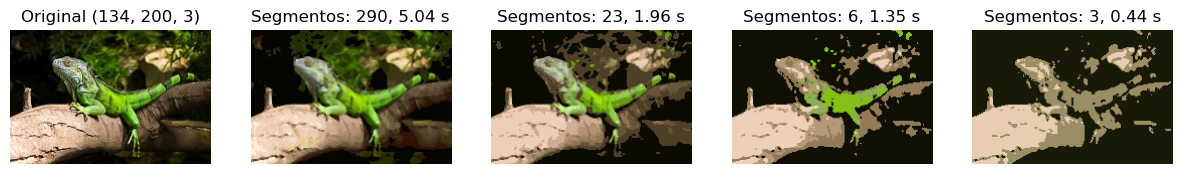

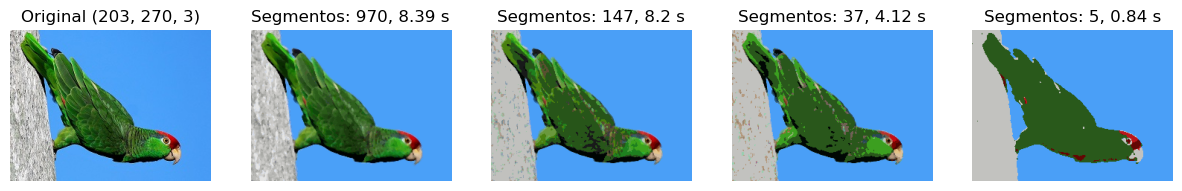

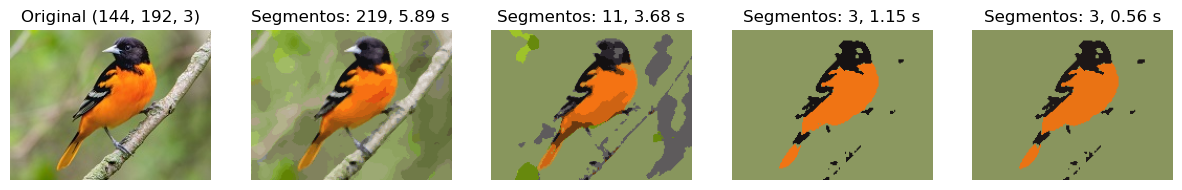

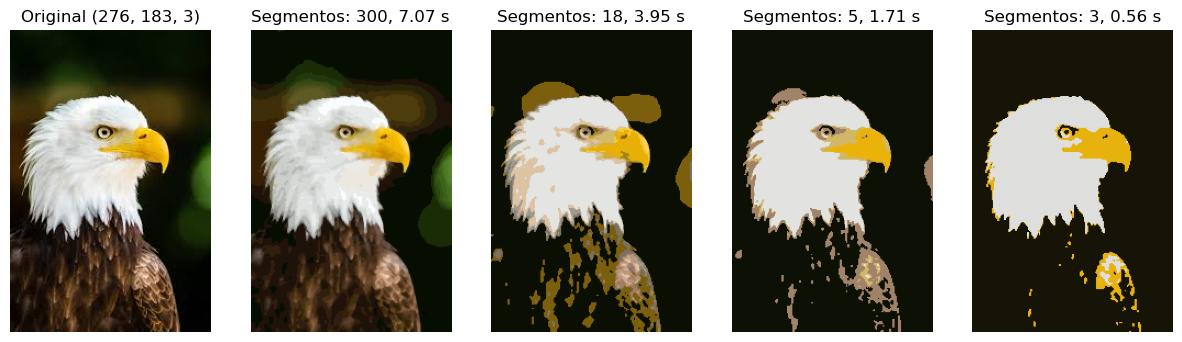

In [13]:
#Definimos los cuantiles
quantiles = [0.01, 0.05, 0.1, 0.2] 

# Iteramos por cada imagen
for img in images:
    # Generamos listas vacías para almacenar las imágenes segmentadas, 
    # su respectivo numero de segmentos, y su tiempo de procesamiento
    segmented_images = []; segments_n = []; processing_time = []
    
    # Iteramos por cada cuantil
    for i in quantiles:
        start_time = time.time() # Registramos la hora de inicio
        
        # Aplicamos la función
        segmented_image, segments = meanshift_apply(img, i)    
        
        end_time = time.time()  # Registramos la hora en la que termino de procesar
        
        # Almacenamos la imagen segmentada, su numero de segmentos, y tiempo de procesamiento
        segmented_images.append(segmented_image); segments_n.append(segments)    
        processing_time.append(round(end_time - start_time, 2))
    
    # Generamos una lista con los textos de numero de segmentos y 
    # tiempo de procesamiento para las graficas
    segments_titles = ['Segmentos: ' + str(segments_n[i]) + ', ' + str(processing_time[i]) + ' s' for i in range(len(segments_n))]
    # Agregamos la imagen original y su titulo
    segmented_images.insert(0, img); segments_titles.insert(0, 'Original '  + str(img.shape))
    
    # Graficamos
    plot_images(segmented_images, segments_titles)

# **Conclusiones** <a class="anchor" id="Conclusiones" ></a>

Es posible observar que el cuantil es inversamente proporcional al numero de segmentos, así como al tiempo de procesamiento. 

# **Referencias** <a class="anchor" id="Referencias" ></a>

* Yugesh Verma. (2024). Hands-On Tutorial on Mean Shift Clustering Algorithm. Retrieved from https://analyticsindiamag.com/hands-on-tutorial-on-mean-shift-clustering-algorithm/
* Geeks For Geeks. (2023). Mean Shift Clustering using Sklearn. Retrieved from Geeks For Geeks: https://www.geeksforgeeks.org/mean-shift-clustering-using-sklearn
* Github - Frederic Jean (2012). Python Module for Mean Shift Image Segmentation. Retrieved from Git: https://github.com/fjean/pymeanshift


https://medium.com/@muhammetbolat/image-segmentation-using-k-means-clustering-algorithm-and-mean-shift-clustering-algorithm-fb6ebe4cb761

https://www.efavdb.com/mean-shift


https://datagen.tech/guides/image-annotation/image-segmentation/

https://www.mathworks.com/discovery/image-segmentation.html#:~:text=Image%20segmentation%20is%20a%20commonly,the%20pixels%20in%20the%20image